ICE-1 LAB ASSIGNMENT 
GROUP NAMES: Ibrahim Alkuwaifi, Farhan Almufleh, Sameer Hussain

Importing libraries 

In [ ]:
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt
import urllib.request
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Getting the web page then converting it to tokens

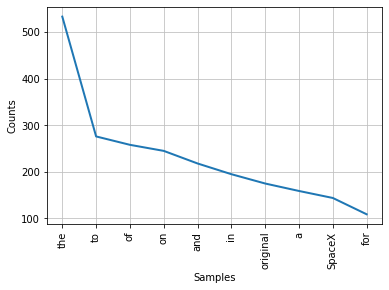

In [ ]:
#request the webpage 
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/SpaceX')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

text = soup.get_text(strip=True)
#splitting the text into a list of words
tokens = [t for t in text.split()]
#copying the list into a new list
clean_tokens = tokens[:]

#Plotting the data with the stopwords
freq = nltk.FreqDist(tokens)
freq.plot(10,cumulative=False)

Removing Stopwords

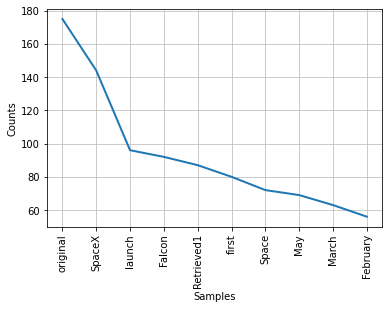

In [ ]:
sr = stopwords.words('english')

#Removing stopwords and digits from our data
for token in tokens:
    if token in stopwords.words('english') or token.isdigit():
        clean_tokens.remove(token)

freq = nltk.FreqDist(clean_tokens)
freq.plot(10,cumulative=False)


Histogram Visualization 

<BarContainer object of 10 artists>

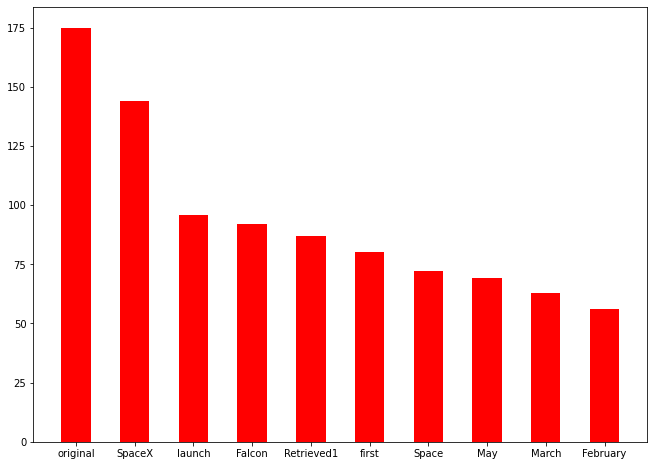

In [ ]:
#cast FreqDit into a dictionary 
newItems = dict(freq)
#get the top 10 values to present in a histogram
top10 = dict(Counter(newItems).most_common(10))
#configure the histogram
plt.figure(figsize=(11, 8))
#plotting the data in a histogram
plt.bar(top10.keys(), top10.values(), width=0.5, color='r', align="center")